# Analysis of Credit Card Fraud Detection Using Deep Learning Techniques

**Research Context and Motivation** 
Creditcardfraudrepresents a critical challenge in financial security, causing billions in annual losses globally. This research addresses the urgent need for
sophisticated, adaptive fraud detection methodologies leveraging cutting-edge machine learning  approaches.

Fraud detection often employs classification techniques, approaching the issue as a binary classification task. In this context, each transaction is classified as either fraudulent (1) or non-fraudulent (0).  This method is most effective when applied to a balanced dataset. 

However, in real-world scenarios, datasets are rarely balanced, as fraudulent transactions represent only a small fraction of the overall data. To address this, synthetic fraudulent data is often generated to balance the dataset.

Given the inherent imbalance in real-world datasets and the fortunate rarity of fraudulent transactions, anomaly detection becomes a highly effective alternative. This approach identifies fraud cases by treating them as anomalies or outliers within the dataset. 
Anomaly detection is particularly valuable when fraudulent transactions are exceedingly rare.

By utilizing advanced deep learning techniques such as autoencoders, Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, or Generative Adversarial Networks
(GANs), the model can learn the normal patterns of non-fraudulent transactions. Deviations from these learned patterns are then flagged as potential frauds, enabling more accurate and efficient  detection of fraudulent activities.

## Table of Content
- [Main Objective](#main-objective)
- [Dataset Overview](#dataset-overview)
    - [Quantitative Characteristics](#quantitative-characteristics)
    - [Feature Architecture](#feature-architecture)
    - [T-SNE](#t-sne)
- [Deep Learning Model Architectures](#deep-learning-model-architectures)
    - [Long Short-Term Memory (LSTM)](#long-short-term-memory-lstm)
    - [Recurrent Neural Networks (RNN)](#recurrent-neural-networks-rnn)
    - [Autoencoders](#autoencoders)
- [Performance Evaluation](#performance-evaluation)
- [Results and Insights](#results-and-insights)
- [Analysis Summary](#analysis-summary)
    - [Possible Flaws in the Autoencoder Model](#possible-flaws-in-the-autoencoder-model)
    - [Plan for future Action](#plan-for-future-action)
- [Concluding Observations](#concluding-observations)
 

# Main Objective
 Evaluate deep learning models’ performance in detecting fraudulent credit card transactions using LSTM, RNN, and Autoencoder techniques to enhance fraud prevention strategies.
 
 ## Dataset Overview
 ### **Quantitative Characteristics**
 - Total Transactions: 284,807
 - Fraudulent Transactions: 492 (0.172% of total)
 - Timespan: Two consecutive days in September 2013
 - Geographical Scope: European cardholders

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plot_utils as pu
 
# Load the dataset
url = 'creditcard.csv'
ccds = pd.read_csv(url)
# Display basic information about the dataset
print(ccds.info())
# Display summary statistics
print(ccds.describe())
# Check for missing values
print(ccds.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

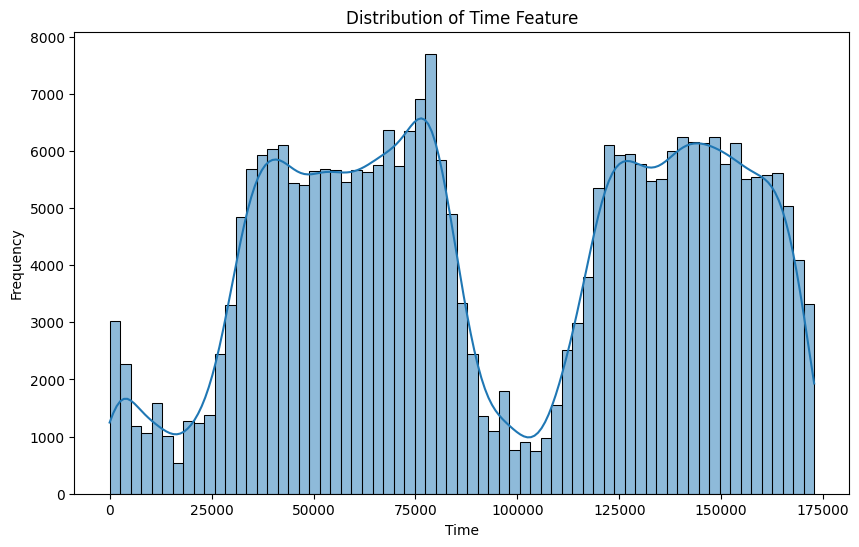

In [2]:
# Plot the 'Time' feature
pu.plot_time(ccds)

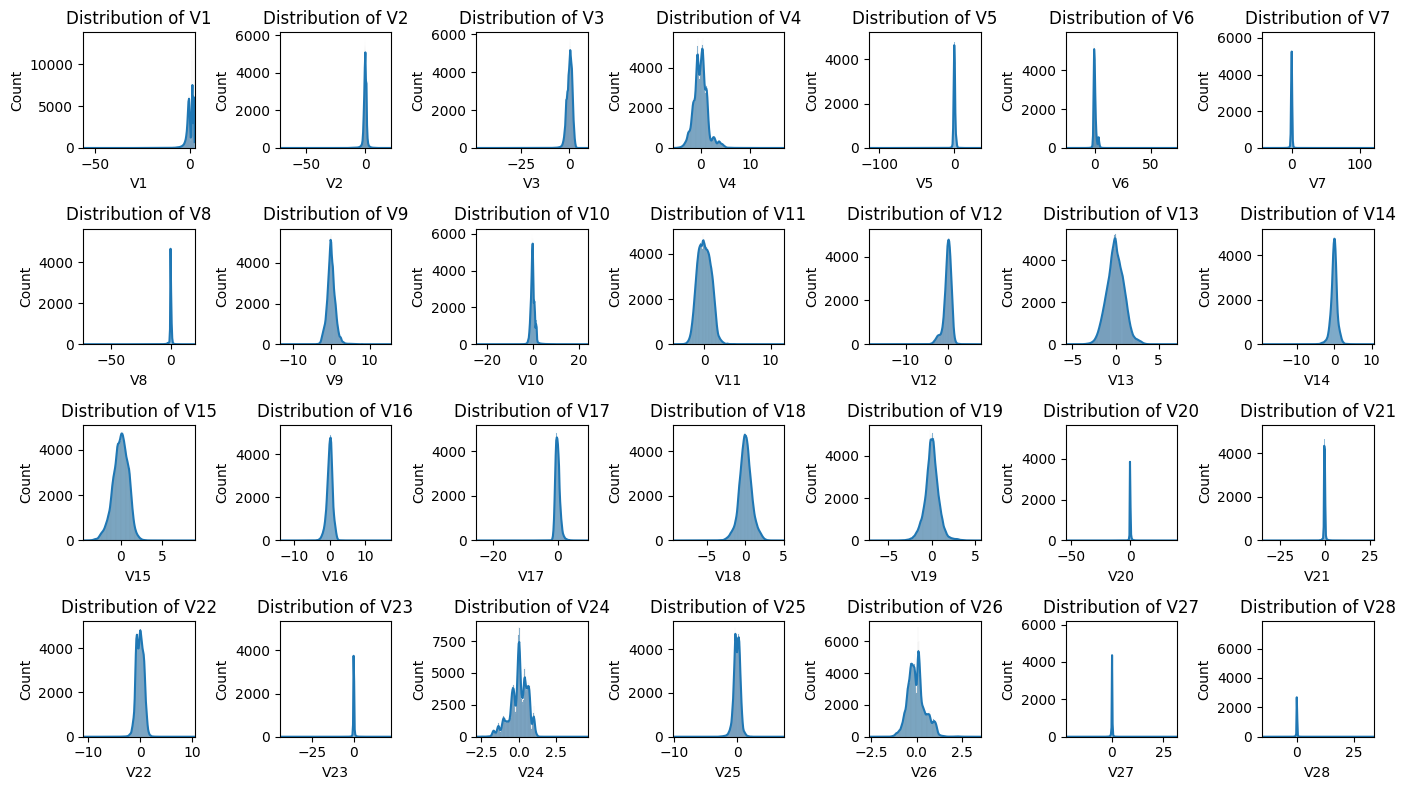

In [15]:
# Plot the anonymized Features V1 to V28
# Features V1 to V28
anonymized_features = [f"V{i}" for i in range(1, 29)]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(14, 8), tight_layout=True)
axes = axes.flatten()

# Plot distribution for each feature
for i, feature in enumerate(anonymized_features):
    sns.histplot(ccds[feature], kde=True, ax=axes[i], color='#1f77b4')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlim([ccds[feature].min(), ccds[feature].max()])

# Remove any empty subplots
for j in range(len(anonymized_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_10120\1050167756.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_corr_matrix = correlation_matrix.applymap(lambda x: round(x, 2))


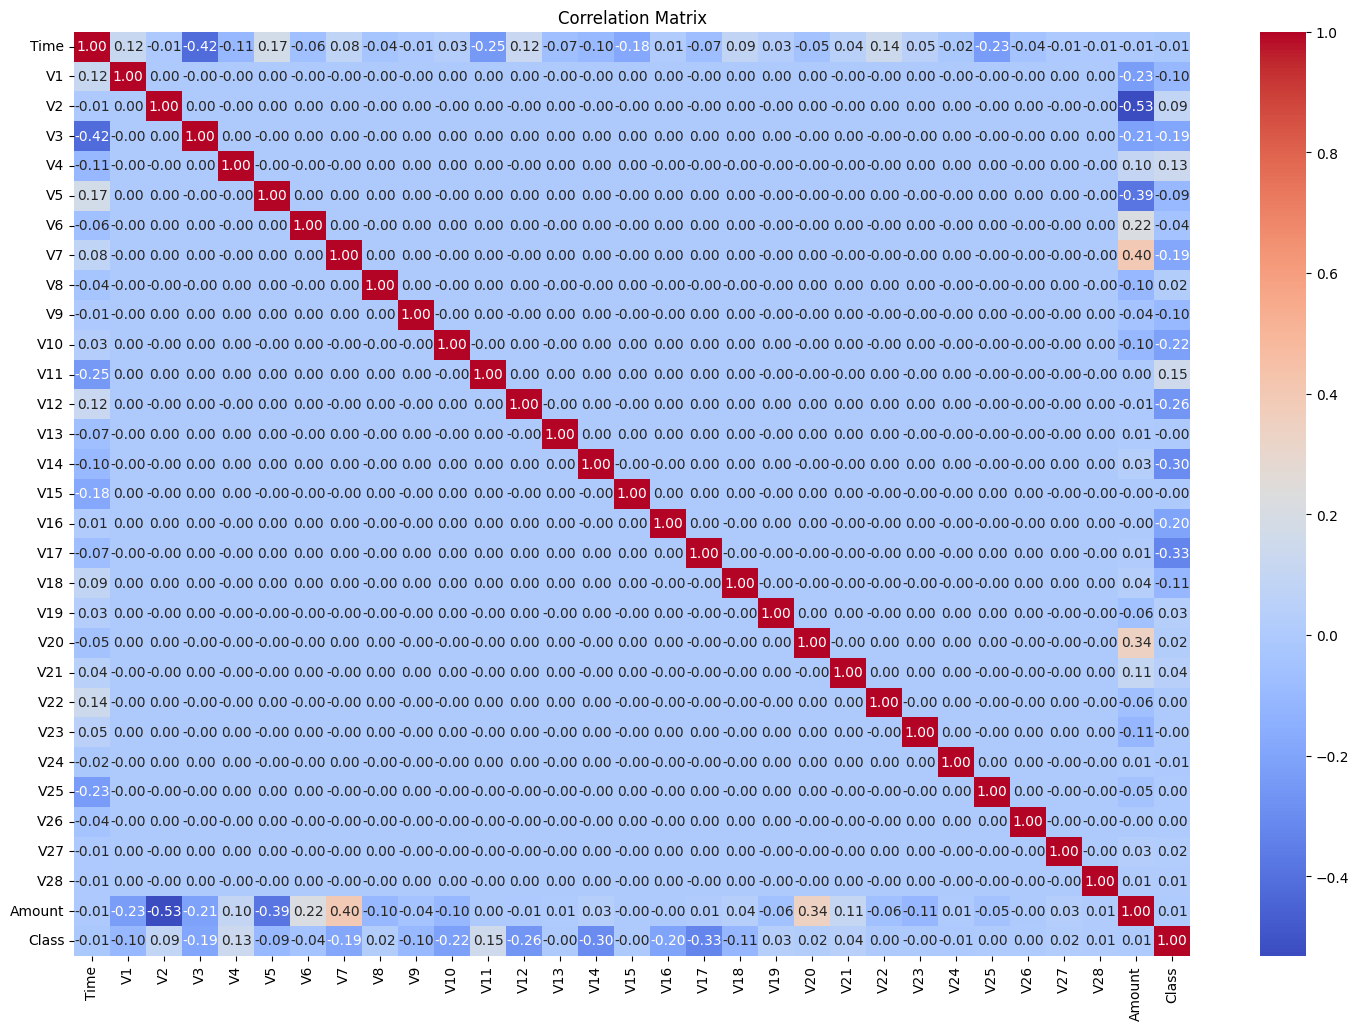

In [4]:
#Correlation MAtrix
plt.figure(figsize=(18, 12))
correlation_matrix = ccds.corr()
# Format the annotations to 2 decimal places, for better representation
formatted_corr_matrix = correlation_matrix.applymap(lambda x: round(x, 2))
sns.heatmap(correlation_matrix, annot=formatted_corr_matrix, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Architecture
**Comprehensive Feature Set: 30 attributes**
 - 2 Explicitly Named Features:
    - Time of Transaction
    - Transaction Amount
 - 28 Anonymized PCA-Transformed Features (V1-V28)
 - No missing values

 **Data Complexity Challenges**
 - Extreme Class Imbalance
 - High-Dimensional Feature Space
 - Anonymized Predictive Variables
 - Short-Duration Transaction Window
 
 In an Anomaly Detection context, leaving the data imbalanced can actually be beneficial.
 Anomaly detection is typically designed to identify and learn from the normal (majority) class while detecting deviations (anomalies) that are rare occurrences.
 Low Correlation with the Target Variable: The ‘Class’ variable, representing fraudulent transactions, does not show high correlation with any single feature. 
 This highlights the complexity of fraud detection, where no single feature is a strong indicator of fraud, necessitating a comprehensive
 analysis of multiple features.

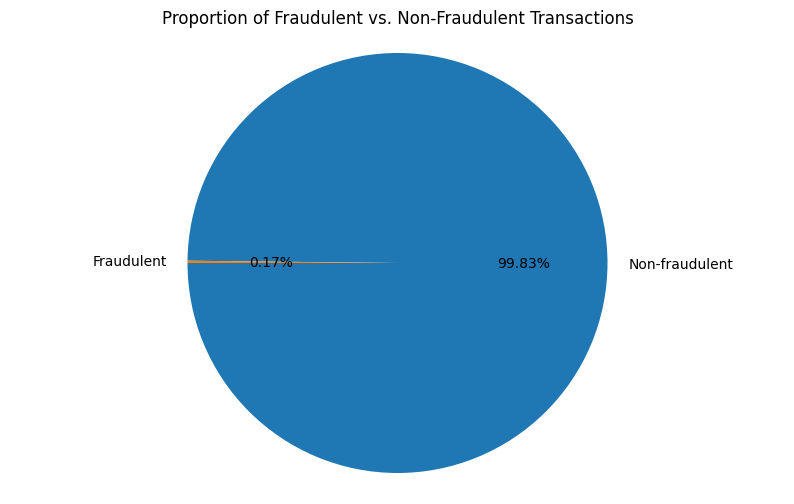

In [17]:
# Plot a pie chat for showing imbalance
pu.pie_chart(ccds)

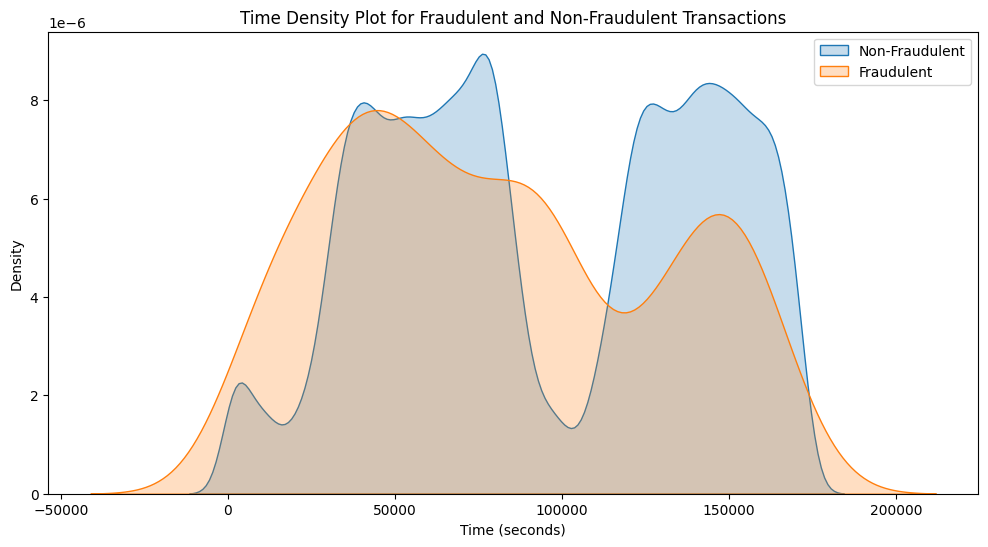

In [5]:
# Separate fraudulent and non-fraudulent transactions
fraud_transactions = ccds[ccds['Class'] == 1]
non_fraud_transactions = ccds[ccds['Class'] == 0]
# Plot the density of transactions over time
plt.figure(figsize=(12, 6))
sns.kdeplot(non_fraud_transactions['Time'], label='Non-Fraudulent', color='#1f77b4', fill=True)
sns.kdeplot(fraud_transactions['Time'], label='Fraudulent', color='#ff7f0e', fill=True)
plt.title('Time Density Plot for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.legend()
plt.show()

## T-SNE
T-SNE(t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique used to visualize high-dimensional data in 2D or 3D space. 
Key characteristics for Anomaly Detection:
- Preserves local data structures
- Reveals clusters and separations in complex datasets
- Helps visualize data distributions

It helps Anomaly Detection Applications:
- Identify outliers visually
- Detect unusual data point clusters
- Preliminary data exploration before applying specific anomaly detection algorithms

The visualization reveals a significant challenge in anomaly detection: the substantial overlap between fraudulent and non-fraudulent transactions. This spatial proximity in the feature space suggests that distinguishing between legitimate and malicious transactions will require sophisticated, nuanced machine learning techniques capable of identifying extremely subtle discriminative patterns.

 The high-dimensional proximity indicates that:
 - Traditional binary classification approaches may struggle
 - Advanced feature engineering is crucial
 - Deep learning models with complex decision boundaries will be essential
 - Unsupervised and semi-supervised techniques might offer more robust solutions
 
 The visualization underscores the intricate nature of financial fraud detection, where malicious activities are strategically designed to mimic normal transactional behavior.
 
 **Methodological Approach**
 Data Normalization Techniques
 - Standardization of ‘Amount’ and ‘Time’ features
 - Scaling to mitigate variable magnitude discrepancies

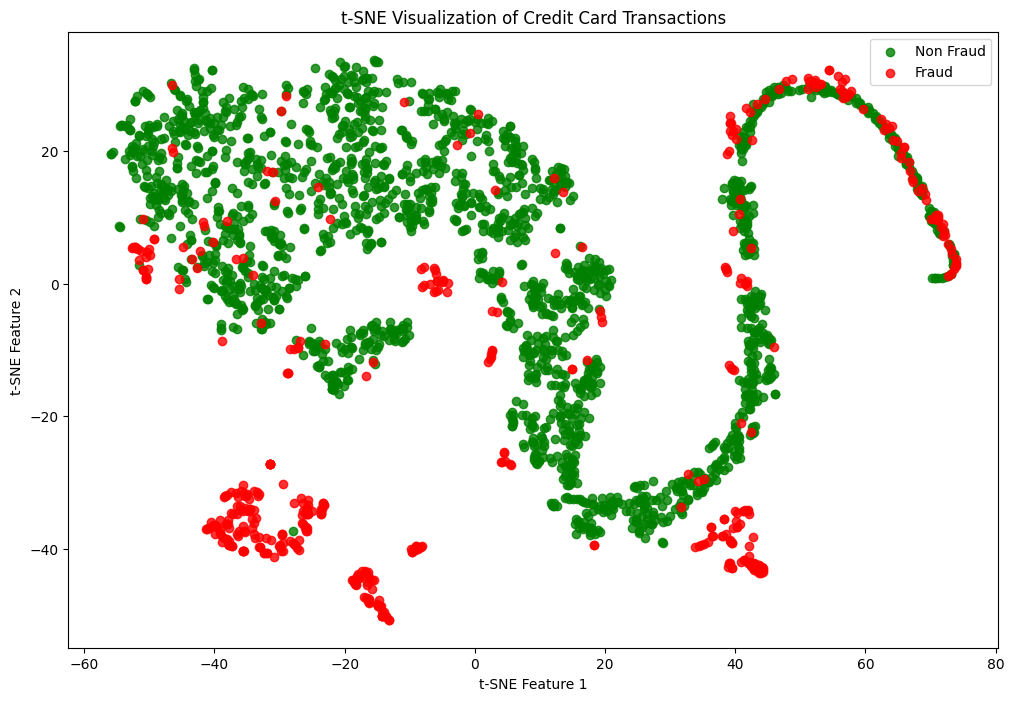

In [6]:
# T-SNE (t-Distributed Stochastic Neighbor Embedding)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
data = ccds.copy()
data["Time"] = data["Time"].apply(lambda x: x / 3600 % 24)
# Sample balanced dataset
non_fraud = data[data['Class'] == 0].sample(2000)
fraud = data[data['Class'] == 1]
df = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis=1).values
Y = df["Class"].values
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_t = tsne.fit_transform(X)
# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(X_t[Y == 0, 0], X_t[Y == 0, 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')
plt.scatter(X_t[Y == 1, 0], X_t[Y == 1, 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
plt.title('t-SNE Visualization of Credit Card Transactions')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(loc='best')
plt.show()

# Deep Learning Model Architectures

### **The Difference Between Classification and Anomaly Detection**
- **Classification**:
    – These models learn from both fraudulent and non-fraudulent transactions.
    – The goal is to classify each transaction based on learned patterns from labeled data.
    – They excel in distinguishing between known patterns of both categories but require labeled datasets for training.
• **Anomaly Detection**:
    – These models focus on learning patterns from non-fraudulent transactions (normal behavior).
    – They then detect anomalies (frauds) based on deviations from these learned patterns.
    – This process is unsupervised and ideal for identifying outliers or rare events without needing explicit labels during training.

### **Deep Learning models to Anomaly Detection**
To effectively use Deep Learning models for anomaly detection, we need to focus on learning normal transactional behavior and then identify deviations.
- **Train on Non-Fraudulent Data**:
    - Train the models only on non-fraudulent transactions to learn normal patterns, similar to autoencoders.
- **Predict Anomalies**:
    - Implement an anomaly score based on reconstruction errors or prediction errors.
    - Set a threshold to differentiate between normal and anomalous transactions.

At the end of the predictions, for each model, we will calculate the classification_report, which provides a detailed performance summary of the anomaly detection model.

- **Anomalies vs. Normal Data**: In Anomaly Detection, the model classifies data points as either “normal” or “anomalous”. When a model’s reconstruction error exceeds a certain
threshold, that data point is flagged as an anomaly.
- **Performance Metrics**: The classification_report from sklearn.metrics gives you key statistics like precision, recall, F1-score, and support for both the “normal” and “anomalous” classes. This way, we can assess how well the models distinguish between normal and anomalous data.

In summary, the classification_report helps understanding the effectiveness of anomaly detection’s models by comparing the predicted labels (y_pred) with the true labels (y_test).
![Process](advanced-anomaly-detection-workflow.svg)


## Long Short-Term Memory (LSTM)
- **Specialization**: Sequential temporal dependency analysis
- **Key Strengths**:– Memory retention of extended historical patterns– Sophisticated gradient flow management– Exceptional handling of time-series financial data

### Layer Breakdown
- **Input Layer** (LSTM with 64 units):
    - **Purpose**: This layer is responsible for reading the input sequences and capturing both short-term and long-term dependencies within the data.
    - **64 Units**: This number of units is chosen to provide sufficient capacity for the model to learn complex patterns.
    - **return_sequences=True**: This ensures that the output of each time step is passed to the next layer, preserving the entire sequence of activities.
- **Dropout Layer** (0.2):
    - **Purpose**: Dropout helps prevent overfitting by randomly setting 20% of the input units to 0 at each update during training time. This encourages the model to generalize better
by not relying too heavily on specific neurons.
- **Second LSTM Layer** (32 units):
    - **Purpose**: This second LSTM layer further processes the output from the first LSTM layer to capture more refined patterns.
    - **32 Units**: A smaller number of units is used in this layer to condense the information further, focusing on deeper sequential patterns.
    - **return_sequences=False**: Since this is the final LSTM layer, we set it to return only the last output in the sequence, which is then passed to the dense output layer.
- **Second Dropout Layer** (0.2):
    - **Purpose**: This dropout layer continues to prevent overfitting by dropping 20% of the units, ensuring the model remains robust and does not overfit on the training data.
- **Output Layer** (Dense with Sigmoid Activation):
    - **Purpose**: The dense layer with a single unit outputs the probability of a transaction being fraudulent.
    - **Sigmoid Activation**: The sigmoid activation function maps the output to a value between 0 and 1, making it suitable for binary classification tasks.

### Summary
- **Stacked LSTM Layers**: The combination of stacked LSTM layers helps the model effectively capture short-term and long-term dependencies within the transactional data.
- **Dropout Layers**: These are crucial in preventing overfitting by randomly dropping units during training, promoting better generalization.
- **Output Layer**: The dense layer with sigmoid activation provides the final probability prediction for fraud detection.


In [7]:
#STEP 1: Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#STEP2: Preprocess the Data
# Separate features and labels
X = ccds.drop('Class', axis=1)
y = ccds['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separate non-fraudulent transactions for training
X_train = X_scaled[y == 0]

# Use both non-fraudulent and fraudulent transactions for testing
X_test = X_scaled
y_test = y

# Reshape input if necessary
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


#STEP 3: Define the LSTM Model
# Define the LSTM model
model_lstm = Sequential(name='LSTM_AnomalyDetectionModel')
model_lstm.add(Input(shape=(1, X_train_reshaped.shape[2]), name='Input_Layer'))
model_lstm.add(LSTM(64, return_sequences=True, name='LSTM_Layer_1'))
model_lstm.add(Dropout(0.2, name='Dropout_Layer_1'))
model_lstm.add(LSTM(32, return_sequences=False, name='LSTM_Layer_2'))
model_lstm.add(Dropout(0.2, name='Dropout_Layer_2'))
model_lstm.add(Dense(X_train_reshaped.shape[2], activation='sigmoid', name='Output_Layer'))

model_lstm.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

#STEP 4: Train the Model
# Train the LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_lstm = model_lstm.fit(X_train_reshaped, X_train_reshaped, epochs=20, batch_size=64, validation_data=(X_test_reshaped, X_test_reshaped), callbacks=[early_stopping], verbose=1)
print(model_lstm.summary())

#STEP 5: Evaluate the Model
# Calculate reconstruction error for LSTM
# Evaluate in batches
batch_size = 1000
mse_lstm = []
for start in range(0, X_test_reshaped.shape[0], batch_size):
    end = min(start + batch_size, X_test_reshaped.shape[0])
    reconstructed_lstm_batch = model_lstm.predict(X_test_reshaped[start:end])
    mse_lstm_batch = np.mean(np.power(X_test_reshaped[start:end]-reconstructed_lstm_batch, 2), axis=2).flatten() # Ensure mse_lstm_batch is␣1D
    mse_lstm.extend(mse_lstm_batch) # Append each batch's MSE
    
mse_lstm = np.array(mse_lstm) # Convert to numpy array

Epoch 1/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 29s 5ms/step - loss: 0.9741 - val_loss: 1.0000
Epoch 2/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 0.9564 - val_loss: 1.0000
Epoch 3/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.9577 - val_loss: 1.0000
Epoch 4/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 0.9707 - val_loss: 0.9998
Epoch 5/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.9724 - val_loss: 0.9998
Epoch 6/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.9642 - val_loss: 0.9998
Epoch 7/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 0.9661 - val_loss: 0.9998
Epoch 8/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.9622 - val_loss: 0.9996
Epoch 9/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 0.9599 - val_loss: 0.9996
Epoch 10/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.9541 - val_loss: 0.9996
Epoch 11/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.9835 - val_loss: 0.9996


Model: "LSTM_AnomalyDetectionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer_1 (LSTM)             │ (None, 1, 64)          │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_1 (Dropout)       │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_Layer_2 (LSTM)             │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_2 (Dropout)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,180 (442.11 KB)

 Trainable params: 37,726 (147.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 75,454 (294.75 KB)

None
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━

In [8]:
# Define a threshold value for anomalies
threshold_lstm = np.percentile(mse_lstm, 95)

# Predict anomalies
y_pred_lstm = mse_lstm > threshold_lstm

# Ensure y_pred_lstm has the same length as y_test
y_pred_lstm = y_pred_lstm[:len(y_test)]

# Flatten predictions for evaluation
y_pred_lstm = y_pred_lstm.flatten()

print(model_lstm.summary())

# Evaluate the performance
from sklearn.metrics import classification_report
print("LSTM Model Performance")
print(classification_report(y_test, y_pred_lstm))

Model: "LSTM_AnomalyDetectionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer_1 (LSTM)             │ (None, 1, 64)          │        24,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_1 (Dropout)       │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_Layer_2 (LSTM)             │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_2 (Dropout)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,180 (442.11 KB)

 Trainable params: 37,726 (147.37 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 75,454 (294.75 KB)

None
LSTM Model Performance
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    284315
           1       0.00      0.08      0.00       492

    accuracy                           0.94    284807
   macro avg       0.50      0.51      0.49    284807
weighted avg       1.00      0.94      0.97    284807



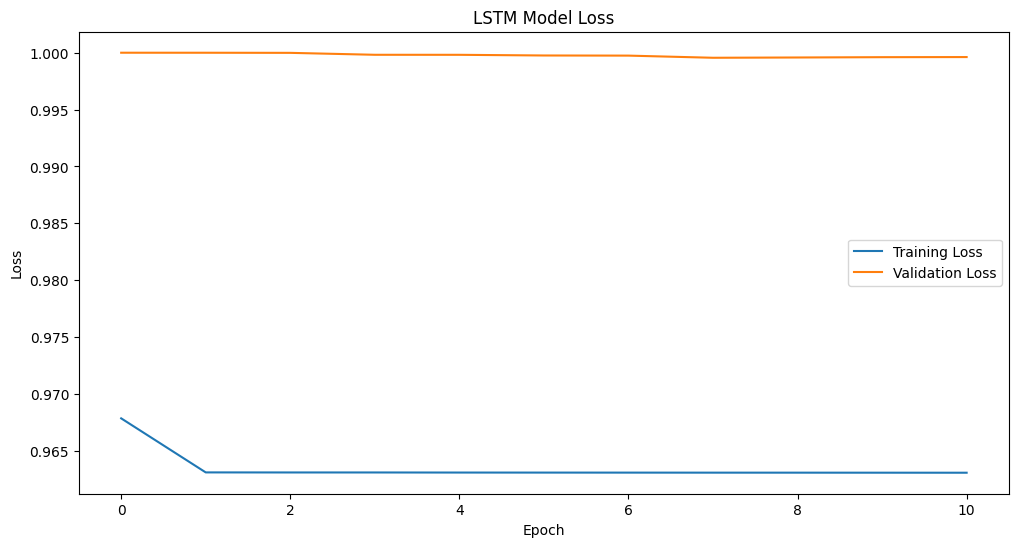

In [9]:
# Plot LSTM model loss
plt.figure(figsize=(12, 6))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Recurrent Neural Networks (RNN)
- **Core Functionality**: Basic sequential pattern recognition
- **Comparative Characteristics**:
    - Simpler architectural design
    - Faster computational processing
    - Limited long-term dependency capture

### **Building the RNN Model Architecture**
**Layer Breakdown**
- **Input Layer** (SimpleRNN with 64 units):
    - **Purpose**: This layer is responsible for reading the input features and capturing the dependencies over time.
    - **64 Units**: The number of units determines the network’s capacity to learn complex patterns. We chose 64 units to balance model complexity and performance.
    - **return_sequences=True**: This ensures that the output from each time step is fed to the next layer, preserving the temporal sequences.
- **Dropout Layer** (0.2):
    - **Purpose**: Dropout helps prevent overfitting by randomly setting a fraction of the input units to 0 at each update during training time.
    - **0.2**: This means 20% of the units will be dropped randomly, promoting generalization in the model.
- **Second SimpleRNN Layer** (32 units):
    - **Purpose**: This layer further processes the output from the previous RNN layer to capture higher-level temporal patterns.
    - **32 Units**: A smaller number of units are used as we move deeper into the network,focusing on refining and condensing information.
    - **return_sequences=False**: Since this is the final RNN layer, we set it to return only the last output in the sequence, which is then passed to the dense output layer.
 - **Second Dropout Layer** (0.2):
    - **Purpose**: This dropout layer continues to prevent overfitting by dropping 20% of the units, further ensuring that the model does not rely too heavily on specific neurons.
- **Output Layer** (Dense with Sigmoid Activation):
    - **Purpose**: Thefinaldenselayerwithasingle unit outputs the probability of a transaction being fraudulent.
    - **Sigmoid Activation**: The sigmoid function maps the output to a value between 0 and 1, making it suitable for binary classification.

### Summary
- **Stacked RNN Layers**: The combination of stacked SimpleRNN layers helps the model learn both immediate and long-term dependencies in transaction sequences.
- **Dropout Layers**: These are crucial for preventing overfitting, especially when working with sequential data, ensuring that the model generalizes well to unseen data.
- **Output Layer**: The dense layer with sigmoid activation provides the final binary classification decision.

In [18]:
#STEP 1: Import libraries
# Already done

#STEP 2: Preprocess the Data
# nothing to do, we reuse the same data as for LSTM model also for the RNN model

#STEP3: Build the RNN Model
# Define the RNN model
model_rnn = Sequential(name='RNN_AnomalyDetectionModel')
model_rnn.add(Input(shape=(1, X_train_reshaped.shape[2]), name='Input_Layer'))
model_rnn.add(SimpleRNN(64, return_sequences=True, name='RNN_Layer_1'))
model_rnn.add(Dropout(0.2, name='Dropout_Layer_1'))
model_rnn.add(SimpleRNN(32, return_sequences=False, name='RNN_Layer_2'))
model_rnn.add(Dropout(0.2, name='Dropout_Layer_2'))
model_rnn.add(Dense(X_train_reshaped.shape[2], activation='sigmoid', name='Output_Layer'))

#STEP4: Train the Model
# Train the LSTM model
model_rnn.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_rnn = model_rnn.fit(X_train_reshaped, X_train_reshaped, epochs=20, batch_size=64, validation_data=(X_test_reshaped, X_test_reshaped), callbacks=[early_stopping], verbose=1)
print(model_rnn.summary())

#STEP5: Evaluate the Model
# Calculate reconstruction error for RNN
# Evaluate in Batches
batch_size = 1000
#mse_rnn = np.array([], dtype=np.float64)
mse_rnn = np.array([])
for start in range(0, X_test_reshaped.shape[0], batch_size):
    end = min(start + batch_size, X_test_reshaped.shape[0])
    reconstructed_rnn_batch = model_rnn.predict(X_test_reshaped[start:end])
    mse_rnn_batch = np.mean(np.power(X_test_reshaped[start:end]-reconstructed_rnn_batch, 2), axis=2).flatten() # Ensure mse_rnn_batch is␣1D
    mse_rnn = np.concatenate((mse_rnn, mse_rnn_batch), axis=0)


Epoch 1/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - loss: 0.9805 - val_loss: 1.0000
Epoch 2/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.9419 - val_loss: 0.9999
Epoch 3/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.9675 - val_loss: 0.9998
Epoch 4/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - loss: 0.9570 - val_loss: 0.9998
Epoch 5/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.9611 - val_loss: 0.9997
Epoch 6/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 0.9742 - val_loss: 0.9997
Epoch 7/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.9663 - val_loss: 0.9997
Epoch 8/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 0.9556 - val_loss: 0.9997
Epoch 9/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - loss: 0.9692 - val_loss: 0.9996
Epoch 10/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - loss: 0.9652 - val_loss: 0.9996
Epoch 11/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 0.9674 - val_loss: 0.9996
Epoch 12/20
4443/44

Model: "RNN_AnomalyDetectionModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ RNN_Layer_1 (SimpleRNN)         │ (None, 1, 64)          │         6,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_1 (Dropout)       │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ RNN_Layer_2 (SimpleRNN)         │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_Layer_2 (Dropout)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,524 (119.24 KB)

 Trainable params: 10,174 (39.74 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,350 (79.50 KB)

None
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
3

In [19]:
# Define a threshold value for anomalies
threshold_rnn = np.percentile(mse_rnn, 95)
# Predict anomalies
y_pred_rnn = mse_rnn > threshold_rnn
# Ensure y_pred_rnn has the same length as y_test
y_pred_rnn = y_pred_rnn[:len(y_test)]
# Flatten predictions for evaluation
y_pred_rnn = y_pred_rnn.flatten()
# Evaluate the performance
print("RNN Model Performance")
print(classification_report(y_test, y_pred_rnn))

RNN Model Performance
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    284315
           1       0.00      0.08      0.00       492

    accuracy                           0.94    284807
   macro avg       0.50      0.51      0.49    284807
weighted avg       1.00      0.94      0.97    284807



# Autoencoders
- **Paradigm**: Unsupervised anomaly detection
- **Distinctive Features**:
    – Reconstructive learning methodology
    - Latent space representation
    – Anomaly highlighting capabilities
 
### **Building the Autoencoder Model Architecture**
### **Layer Breakdown**
 ### Encoder
 - **Input Layer** (Input_Layer): This is the input layer. The shape is defined by the number of features in your data (input_dim). This layer takes in the raw data.
 - **First Encoding Layer** (Encoding_Layer_1): The first encoding layer reduces the input dimensions to 32. The relu activation function introduces non-linearity, helping the model
 learn complex patterns.
 - **Second Encoding Layer** (Encoding_Layer_2): This layer further reduces the dimensions to 16, continuing to compress the information while maintaining important features.
 - **Third Encoding Layer** (Encoding_Layer_3): The last encoding layer compresses the data to an 8-dimensional space. This is the bottleneck layer, capturing the most compressed
 representation of the data. The small dimension helps isolate anomalies since anomalies will differ more significantly after being compressed and reconstructed.
 ### Decoder
 - **First Decoding Layer** (Decoding_Layer_1): This layer begins to reconstruct the data by expanding the dimensions back to 16. The goal is to mirror the encoding layers to regain the
 original data shape.
 - **Second Decoding Layer** (Decoding_Layer_2): Here, the layer further expands the dimensions to 32, following the symmetric structure of the autoencoder.
 - **Output Layer** (Output_Layer): The final layer reconstructs the data back to the original input dimension. The sigmoid activation function is used to ensure the output ranges between 0 and 1, which is beneficial if you’re dealing with normalized data.
 - **Layer Sizes**: The layer sizes progressively decrease and then increase to form a bottleneck, which helps capture key features and isolate anomalies.
 - **Activation Functions**: ReLU is used in the hidden layers to introduce non-linearity and improve learning capacity. Sigmoid in the output layer ensures that the reconstructed outputs remain in the same range as the input data.
 
 This architecture was chosen to effectively compress the input data to a lower-dimensional space (encoder) and then reconstruct it back to its original form (decoder). By training the autoencoder to minimize reconstruction error, the model learns to distinguish between normal data and anomalies (which have higher reconstruction errors).

In [20]:
#STEP 1: Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

#STEP 2: Preprocess the Data
# nothing to do, we reuse the same data as for LSTM model also for the RNN model

#STEP3: Build the Autoencoder Model
# Define the input dimension
input_dim = X_train.shape[1]

# Define the Autoencoder model

#Input layer
input_layer = Input(shape=(input_dim,), name='Input_Layer')

#Encoder
encoded = Dense(32, activation='relu', name='Encoding_Layer_1')(input_layer)
encoded = Dense(16, activation='relu', name='Encoding_Layer_2')(encoded)
encoded = Dense(8, activation='relu', name='Encoding_Layer_3')(encoded)

#Decoder
decoded = Dense(16, activation='relu', name='Decoding_Layer_1')(encoded)
decoded = Dense(32, activation='relu', name='Decoding_Layer_2')(decoded)

#Output layer
output_layer = Dense(input_dim, activation='sigmoid', name='Output_Layer')(decoded)

# Create the Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer, name='Autoencoder_Fraud_Detection')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
print(autoencoder.summary())

#STEP4: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=64, validation_data=(X_test, X_test), callbacks=[early_stopping], verbose=1)

#STEP5: Evaluate the Model
# Calculate reconstruction error on the test set
reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test- reconstructed, 2), axis=1)

# Define a threshold value for anomalies
threshold = np.percentile(mse, 95)

# Predict anomalies
y_pred = mse > threshold

Model: "Autoencoder_Fraud_Detection"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding_Layer_1 (Dense)        │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding_Layer_2 (Dense)        │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoding_Layer_3 (Dense)        │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding_Layer_1 (Dense)        │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoding_Layer_2 (Dense)        │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,334 (13.02 KB)

 Trainable params: 3,334 (13.02 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.8809 - val_loss: 0.8214
Epoch 2/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.7819 - val_loss: 0.7967
Epoch 3/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.7576 - val_loss: 0.7875
Epoch 4/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.7431 - val_loss: 0.7745
Epoch 5/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - loss: 0.7341 - val_loss: 0.7712
Epoch 6/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.7248 - val_loss: 0.7685
Epoch 7/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.7311 - val_loss: 0.7668
Epoch 8/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 0.7206 - val_loss: 0.7644
Epoch 9/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.7324 - val_loss: 0.7624
Epoch 10/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.7267 - val_loss: 0.7613
Epoch 11/20
4443/4443 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.7188 - val_loss: 0.7594
Epoch 12/20
44

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    284315
           1       0.03      0.87      0.06       492

    accuracy                           0.95    284807
   macro avg       0.51      0.91      0.52    284807
weighted avg       1.00      0.95      0.97    284807



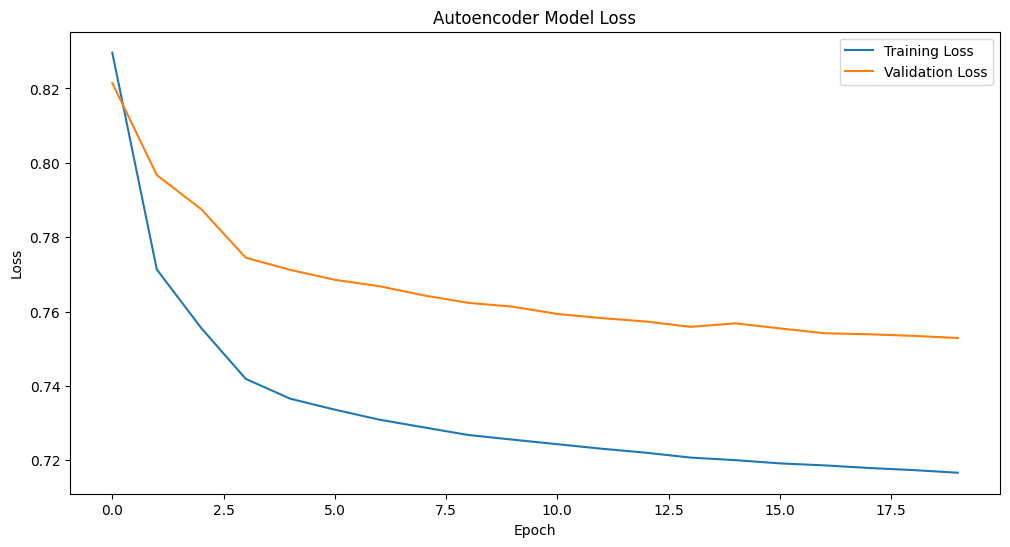

In [21]:
#STEP6: Evaluate the Model
# Evaluate the performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Performance Evaluation
- **Comprehensive Metrics**:
    - Accuracy
    - Precision
    - Recall
    - F1-Score
    - Computational Efficiency

### **Autoencoders Model**:
- **Accuracy**: 0.95
- **Macro Avg Precision/Recall/F1-Score**: 0.52/0.91/0.52
- **Weighted Avg Precision/Recall/F1-Score**: 1.00/0.95/0.97

### **RNN Model**:
 - **To detect Class 0**:
    - **Precision**: 1.00
    - **Recall**: 0.94
    - **F1-Score**: 0.97
 - **To detect Class 1**:
    - Precision: 0.00
    - Recall: 0.08
    - F1-Score: 0.00

- **Accuracy**: 0.94
- **Macro Avg Precision/Recall/F1-Score**: 0.50/0.51/0.49
- **Weighted Avg Precision/Recall/F1-Score**: 1.00/0.94/0.97
 
 ### **LSTM Model**:
 - **Similar performance to RNN**:
    - **Class 0**: 
        - **Precision**: 1.00
        - **Recall**: 0.94 
        - **F1-Score**: 0.97
    - **Class 1**: 
        - **Precision**: 0.00
        - **Recall**: 0.08
        - **F1-Score**: 0.00
 - **Accuracy**: 0.94
 - **Macro Avg Precision/Recall/F1-Score**: 0.50/0.51/0.49
 - **Weighted Avg Precision/Recall/F1-Score**: 1.00/0.94/0.97
 
 ### **Comparison Highlights**:
 - **Autoencoders**: Exhibits slightly higher accuracy and stronger performance in macro avg precision and recall and are computationally much more efficient.
 - **RNN** & **LSTM**: Both show similar efficiencies and higher weighted avg metrics but struggle with imbalance in detection of Class 1. It takes much longer time to tran and evauate them.

# Results and Insights

### **Model Performance Ranking**:
- **LSTM** & **RNN**:
    – Both showed nearly identical performance, so saying that the LSTM is “superior” might be an overstatement. Both models had challenges with detecting Class 1 (fraud), 
    reflected by a precision of 0.00 and recall of 0.08.
    – Their strength lies in detecting Class 0 with a precision of 1.00 and an overall accuracy of 0.94.
- **Autoencoder**:
    – Indeed performed with a slightly higher accuracy (0.95) compared to RNN and LSTM (0.94).
    – Generates higher false positives but offers advantages in anomaly detection and visualization.
    – The weighted averages are quite high, but there are general challenges with imbalanced classification, evident in macro avg.
 
 ## Refined Conclusion:
 Model Performance Ranking
 - 1. **Autoencoder**: 
    - Marginally better overall accuracy.
    - Suitable  for anomaly detection and visualization, despite higher false positives.

- 2. **RNN** & **LSTM** (tied):
    - Both models show robust performance in sequential learning.
    - Strong in detecting non-fraudulent cases, less effective in fraud detection.
    - Accurate yet struggle with class imbalance, evidenced by low precision and recall for fraud cases.

# Recommendations
**Immediate Implementation**
- Shift focus to an Autoencoder-based fraud detection system considering its marginally better performance and higher accuracy.
- Develop robust model monitoring infrastructure to identify performance drifts and anomalies.
- Implement continuous learning mechanisms to adapt to new patterns and maintain performance.

**Future Research Directions**
- Integrate additional contextual features that might improve model sensitivity and specificity.
- Explore hybrid model architectures that combine the strengths of different models for more robust detection.
- Develop real-time fraud detection capabilities to immediately flag and address suspicious activities.
- Investigate advanced sampling techniques to better manage imbalanced datasets and improve the detection of rare fraud cases.


# Analysis Summary:
In real-world scenarios, credit card fraud detection often deals with highly imbalanced data. Upon comparison of different models, we determined that the Autoencoder model performed the best given the current data.

## Possible Flaws in the Autoencoder Model:
- 1. **Class Imbalance Bias**: Even though the Autoencoder performed well, it could still be biased towards the majority class, leading to higher false positives.
- 2. **Overfitting Risks**: Given its complexity, the Autoencoder might overfit the training data, making it less effective on unseen data.
- 3. **Feature Limitations**: The current features might not fully capture the complexities of fraud patterns, limiting the Autoencoder’s efficacy.
- 4. **Scalability Challenges**: The computational cost of running the Autoencoder in real-time can be significant, posing scalability issues.
- 5. **Metric Dependence**: The reliance on accuracy as a primary metric can be misleading, especially in imbalanced datasets, requiring more comprehensive metric use.

## Plan for future Action:
- 1. **Data Augmentation**:
    - **Collect Additional Data**: Gather more diverse datasets including various types of fraudulent transactions for improved representation.
    - **Synthetic Oversampling**: Apply techniques like SMOTE to artificially balance the dataset.
- 2. **Exploring Alternative Models**:
    - **Hybrid Models**: Combine the autoencoder’s anomaly detection strengths with classification models to improve overall effectiveness.
    - **Advanced Anomaly Detection Techniques**: Experiment with **Isolation Forests**, **One-Class SVMs**, and **GANs** (Generative Adversarial Networks) to compare performance.
- 3. **Feature Engineering**:
    - **Contextual Features**: Introduce additional features such as geolocation, transaction sequences, and user behavior patterns.
    - **Temporal Patterns**: Extract and utilize features that capture transaction timestamps and sequences to detect temporal fraud patterns better.
- 4. **Comprehensive Evaluation Metrics**:
    - **Additional Metrics**: Focus on metrics like Precision, Recall, F1-Score, and ROC-AUC to get a balanced view of the model’s performance.
- 5. **Continuous Model Improvement**:
    - **Active Learning**: Continuously update the model with new data to adapt to evolving fraud patterns.
    - **Robust Monitoring**: Implement a real-time monitoring system to detect and address model performance drifts.
- 6. **Scalability and Efficiency**:
    - **Optimization**: Optimize the autoencoder for lower computational cost while maintaining high performance.
    - **Resource Allocation**: Utilize distributed computing techniques to manage large-scale data operations efficiently.


# Concluding Observations
This research underscores the transformative potential of deep learning in financial fraud detection.
It highlights the critical role of sophisticated machine learning techniques, such as **Autoencoders**, **RNN**, and **LSTM**, in safeguarding financial ecosystems, and underscores the importance of continuous learning and advanced methodologies to adapt to emerging threats.